In [14]:
from __future__ import print_function, division
import os, sys, json, pylab as pl, numpy as np, pandas as pd
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Task 1: Event Detection

In [15]:
df = np.load('MTA_Fare.npy')

In [16]:
ridetype = np.array(['10T', '14D', '1D', '2T', '30D', '7D', 'ADA', 'AFAS',
                     'EXP','EZ','FF','MC','MR','MTHLY','RFM','RR','SEN',
                     'SPEC','TCMC','TKT','UNL','XBUS','STUD'])

In [17]:
df = df.astype('float')

In [18]:
df[df == -1] = np.nan

In [19]:
ridesDate = pd.date_range(start='05/28/2010', end='02/07/2014', freq='W-Fri')

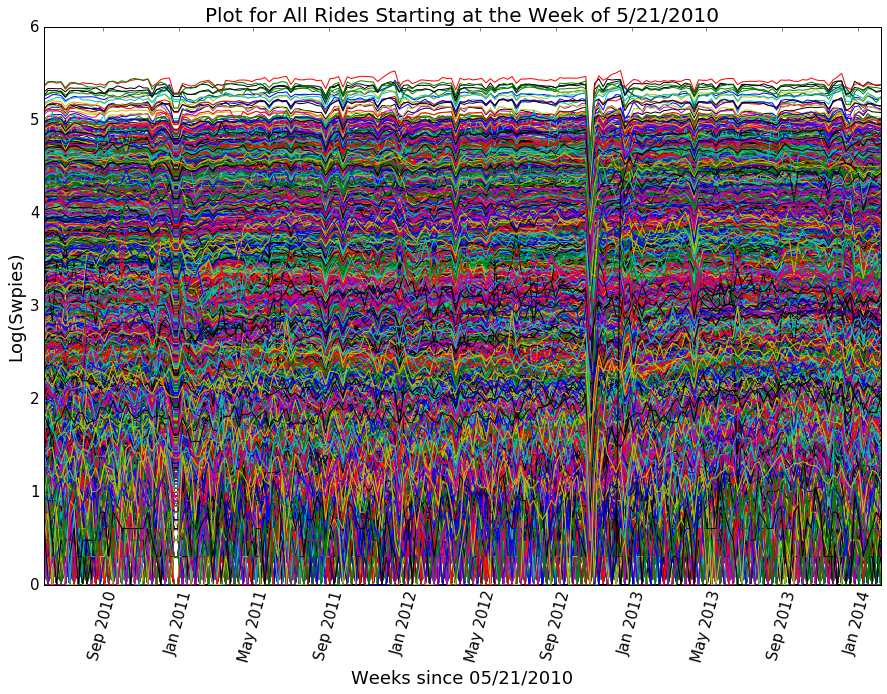

In [26]:
pl.figure(figsize=(15,10))
for i in arange(len(df)):
    for j in arange(len(df[i])):
        pl.plot(ridesDate, np.log10(df[i][j]))
pl.xlabel('Weeks since 05/21/2010', fontsize = 18)
pl.ylabel('Log(Swpies)', fontsize = 18)
pl.xticks(rotation=75, fontsize=15)
pl.yticks(fontsize=15)
pl.title('Plot for All Rides Starting at the Week of 5/21/2010', fontsize = 20)

### Swipes by each type of card and in each station from 05/21/2010 to 02/21/2014. Between Sep 2012 and Jan 2013, there has been a big drop and bounce back for all rides. 

In [25]:
sum_stations = np.nansum(df, axis=0)
mean_stations = np.nanmean(df, axis=0)
sum_cardtypes = np.nansum(df, axis=1)
mean_cardtypes = np.nanmean(df, axis=1)
all_sum = np.nansum(sum_cardtypes, axis=0)

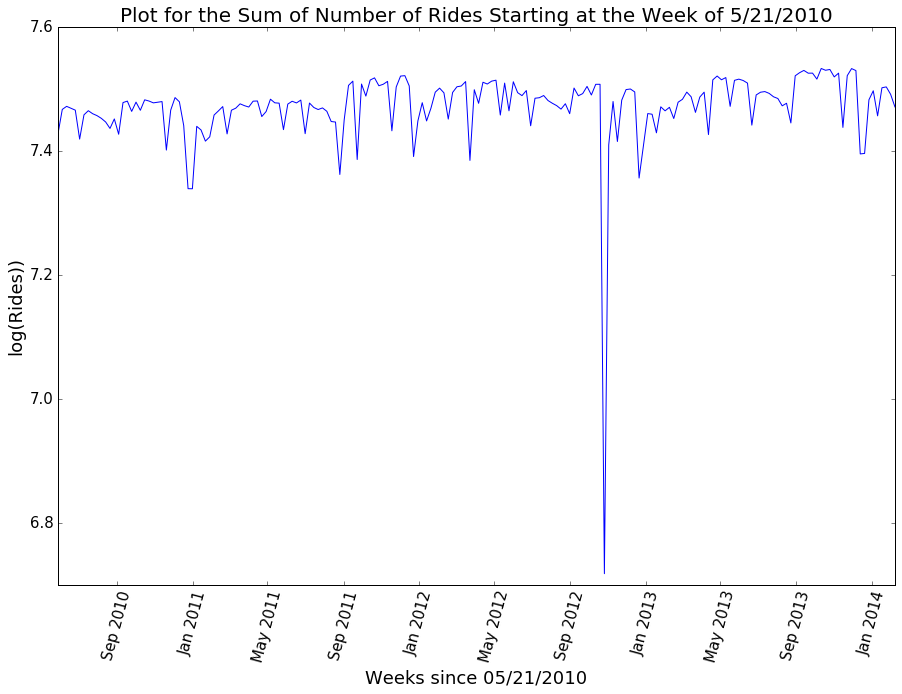

In [27]:
pl.figure(figsize=(15,10))
pl.plot(ridesDate, np.log10(all_sum))
pl.xlabel('Weeks since 05/21/2010', fontsize=18)
pl.ylabel('log(Rides))', fontsize=18)
pl.xticks(rotation=75, fontsize=15)
pl.yticks(fontsize=15)
pl.title('Plot for the Sum of Number of Rides Starting at the Week of 5/21/2010', fontsize=20)

## This plot shows more clearly that something abnormal happened between Sep 2012 and Jan 2013. 

In [30]:
all_mean = np.nanmean(all_sum)
all_sd = np.nanstd(all_sum)
thresholds = [all_mean + 3 * all_sd, all_mean - 3 * all_sd]
print ("Average Number of Rides: {:}".format(int(all_mean)))
print ("Standard Deviation of Number of Rides: {:}".format(int(all_sd)))
print ("3-Sigma Thresholds {:.2f} {:.2f}".format(*thresholds))
print ("Data Starting from", min(ridesDate))

Average Number of Rides: 29781349
Standard Deviation of Number of Rides: 2983960
3-Sigma Thresholds 38733231.14 20829468.61
Data Starting from 2010-05-28 00:00:00


In [33]:
outliers = ridesDate[((all_sum > thresholds[0]) | (all_sum < thresholds[1]))]
print(outliers)

DatetimeIndex(['2012-10-26'], dtype='datetime64[ns]', freq='W-FRI')


## 10/26/2012 is the abnormal event during this period of time. I Googled online and found this piece of news: 
### "Governor Cuomo Declares State of Emergency in New York in Preparation for Potential Impact of Hurricane Sandy" 

# Task 2: Identify Ridership Trends

In [35]:
df1 = pd.DataFrame()
for i in arange(len(ridetype)):
    df1[ridetype[i]] = mean_stations[i]
df1['Date'] = pd.DataFrame(ridesDate)

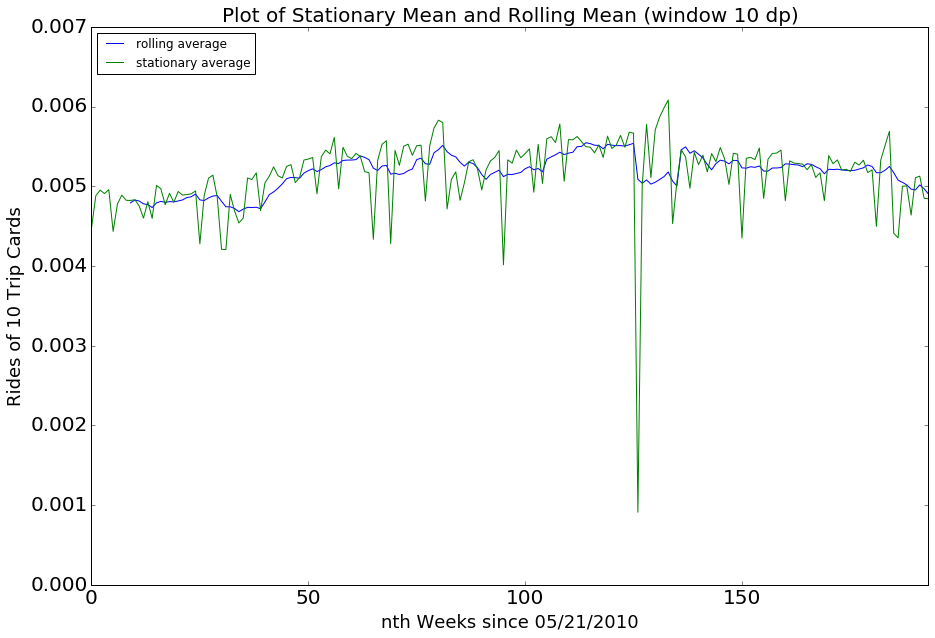

In [40]:
fig = pl.figure(figsize=(15,10))
ax = pd.rolling_mean(df1['10T']/df1['10T'].sum(), 10).plot(fontsize=20, label = "rolling average")
ax.set_title("Plot of Stationary Mean and Rolling Mean (window 10 dp)", fontsize=20)
pl.xlabel('nth Week since 05/21/2010', fontsize = 18)
pl.ylabel('Rides of 10 Trip Cards', fontsize = 18)
ax.plot(df1['10T']/df1['10T'].sum(), label = "stationary average")
pl.legend(loc = 2)

## 

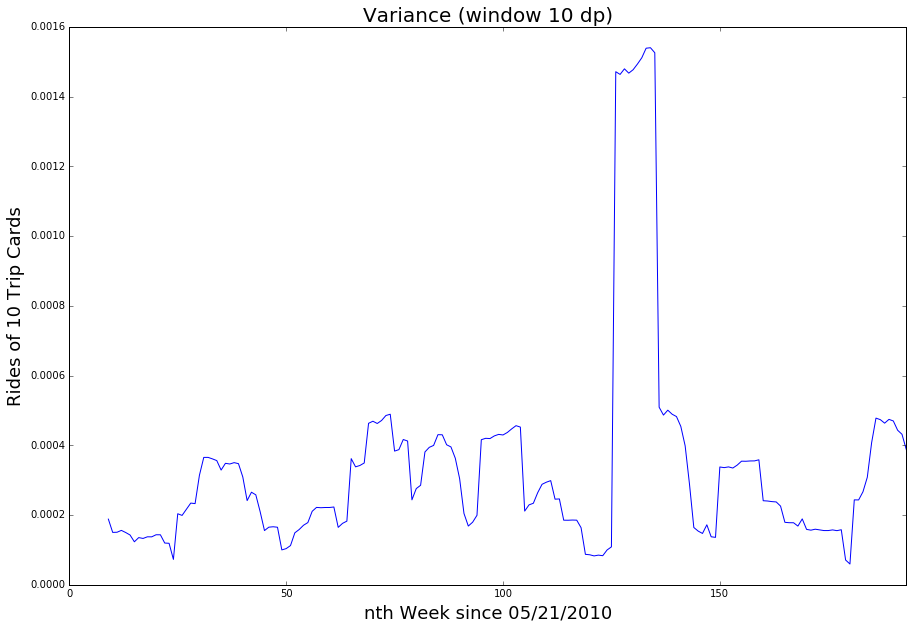

In [42]:
fig = pl.figure(figsize=(15,10))
ax = pd.rolling_std(df1['10T']/df1['10T'].sum(), 10).plot()
ax.set_title("Variance (window 10 dp)", fontsize=20)
pl.xlabel("nth Week since 05/21/2010", fontsize=18)
pl.ylabel("Rides of 10 Trip Cards", fontsize=18)

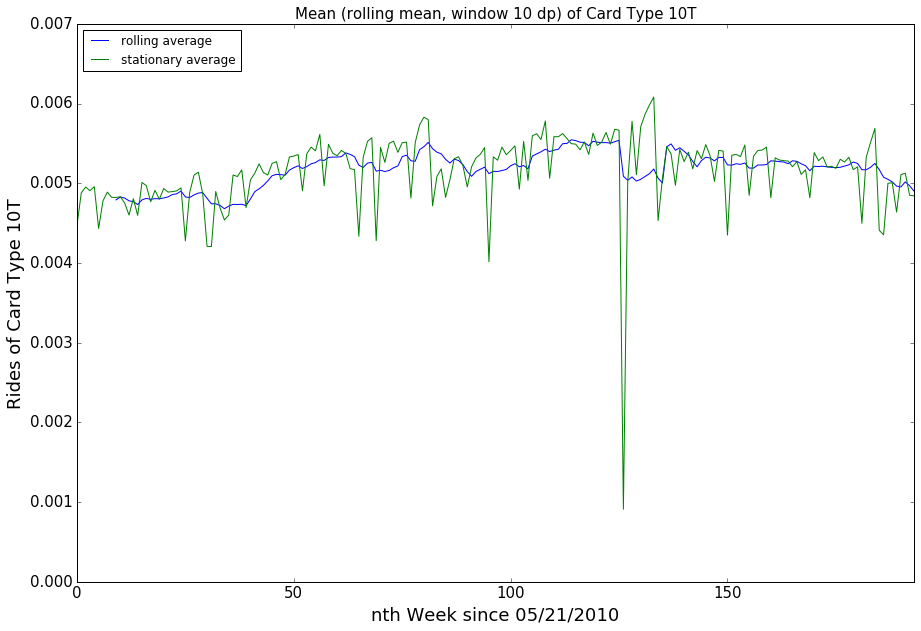

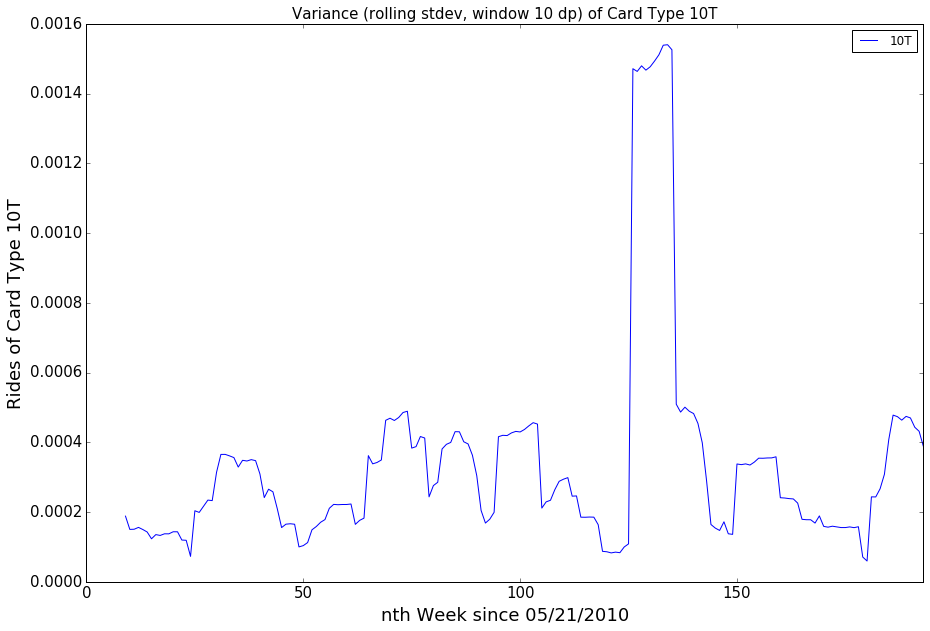

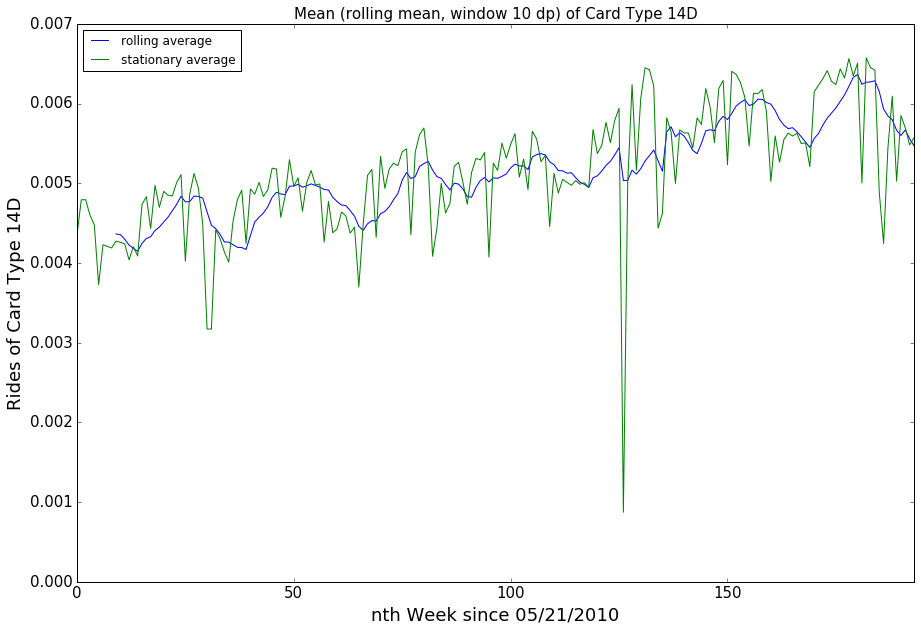

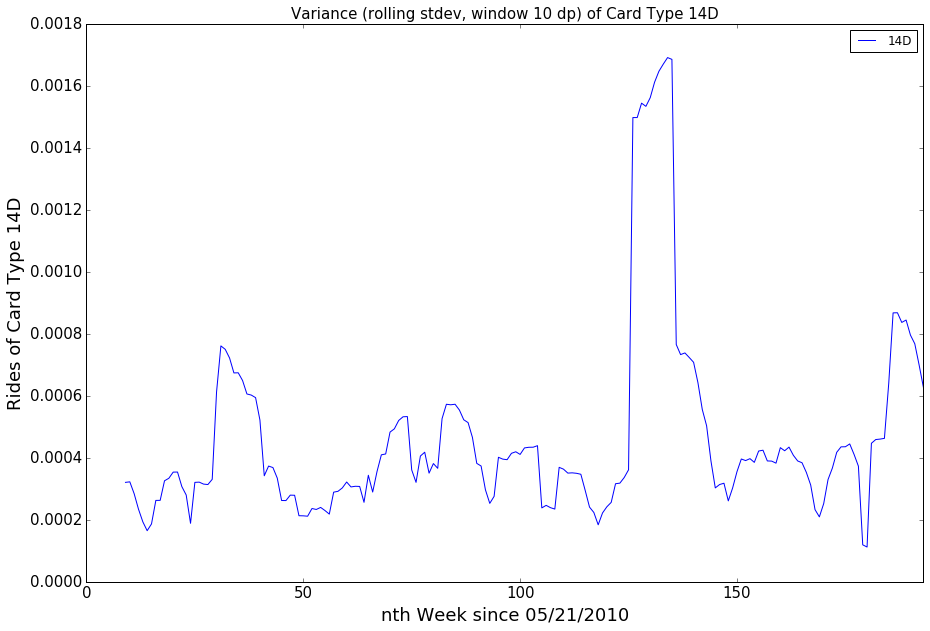

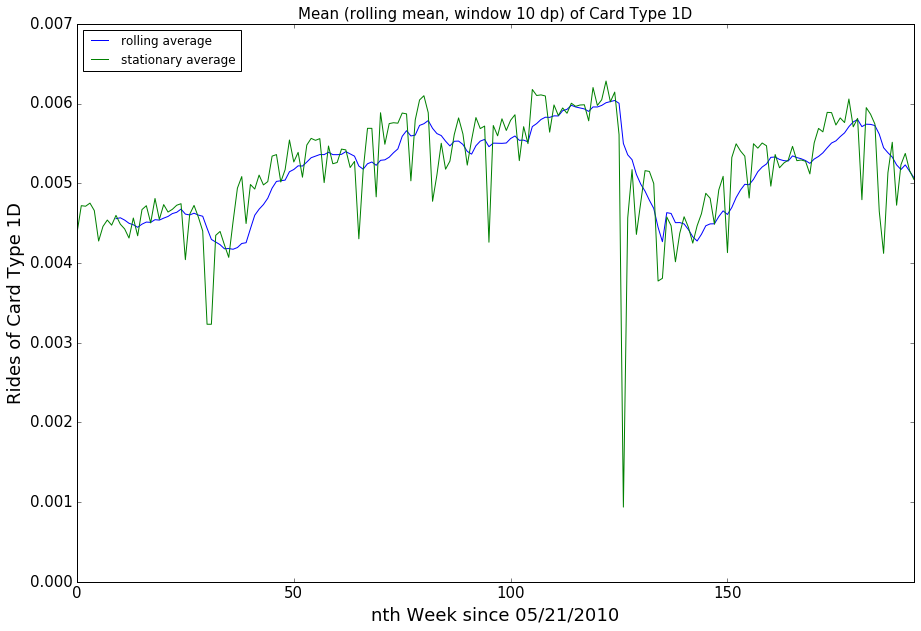

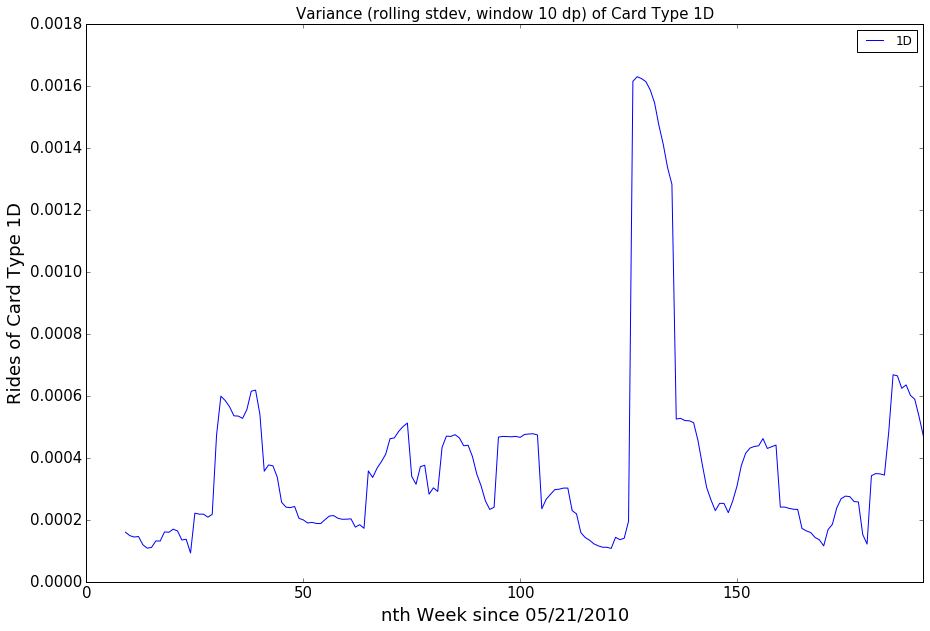

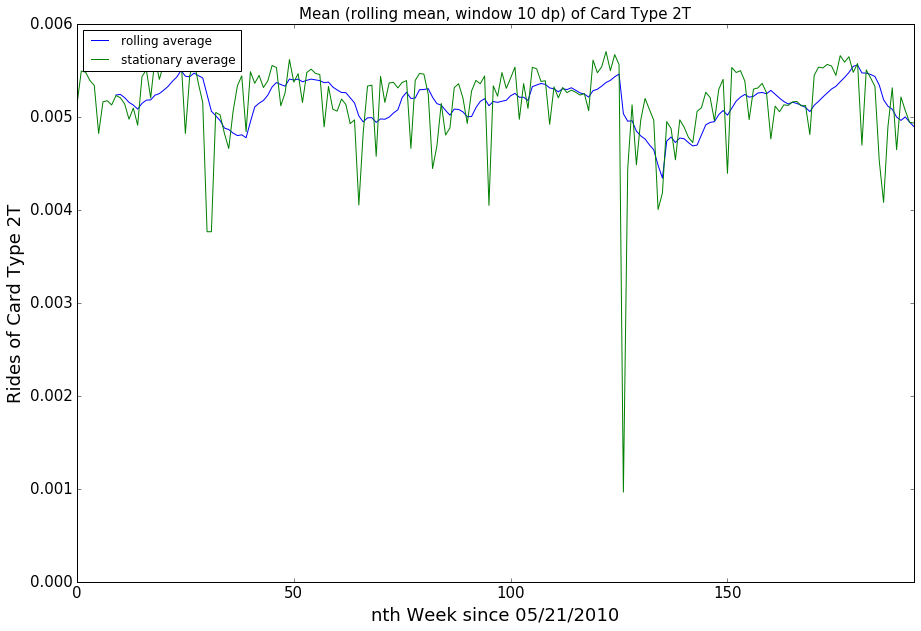

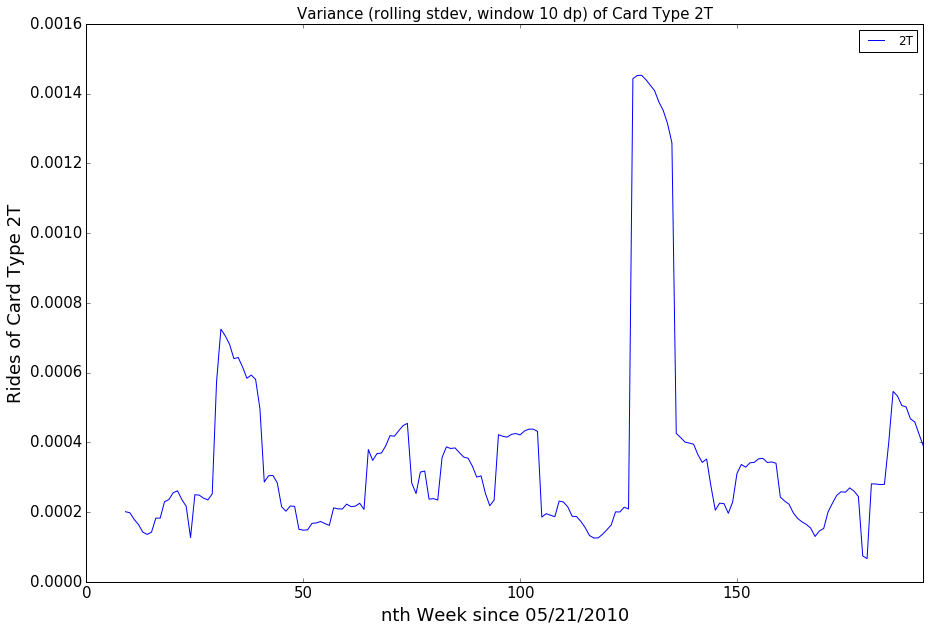

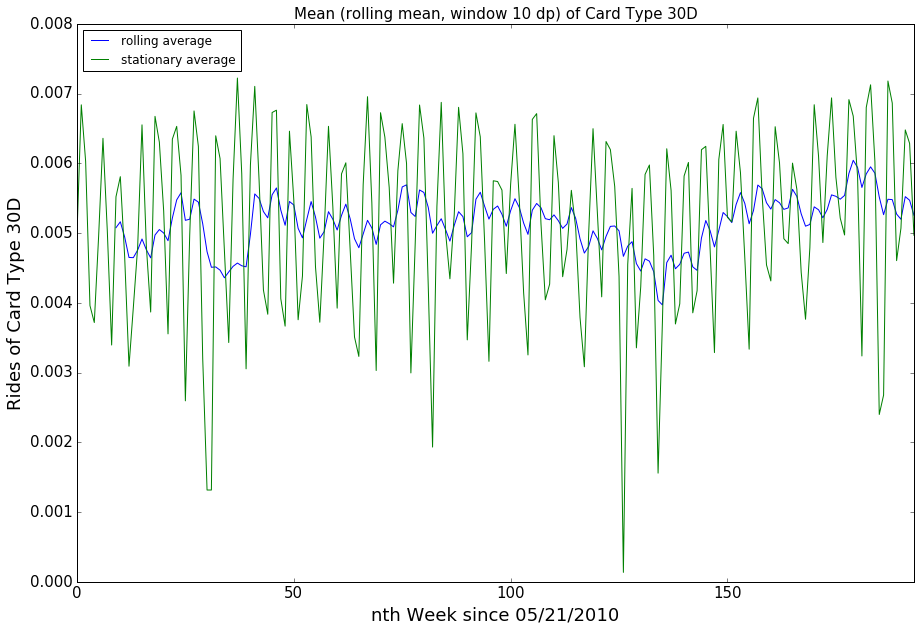

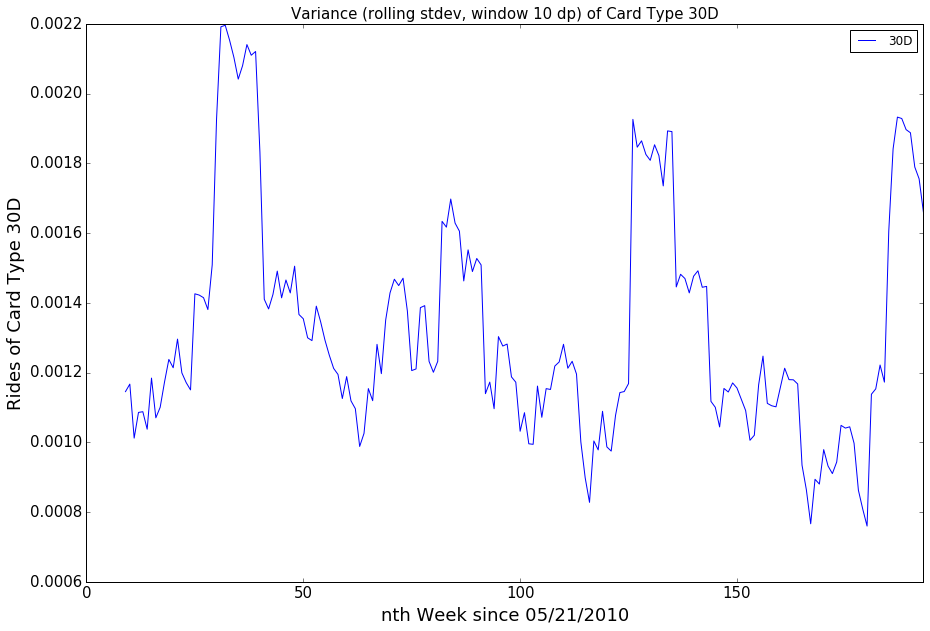

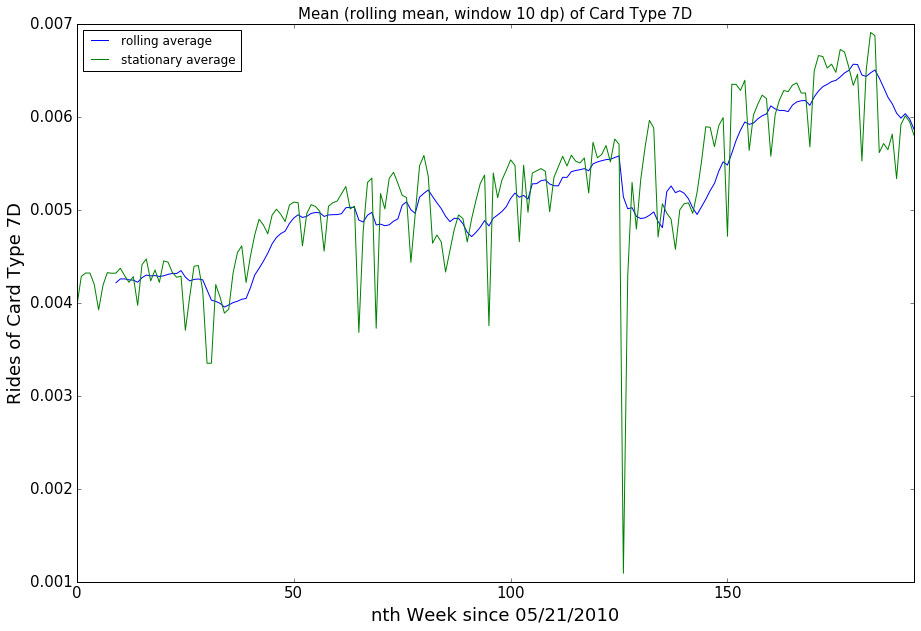

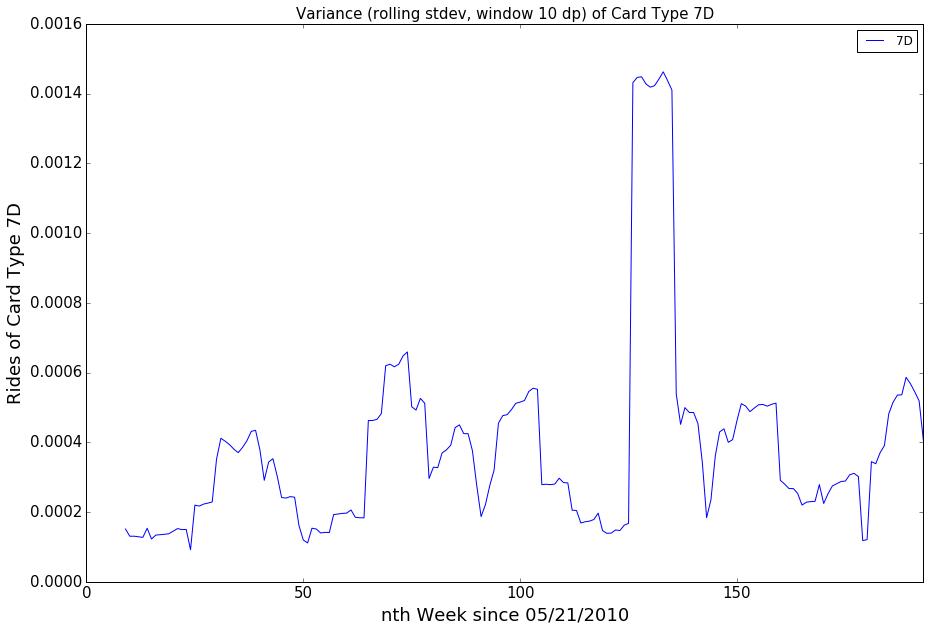

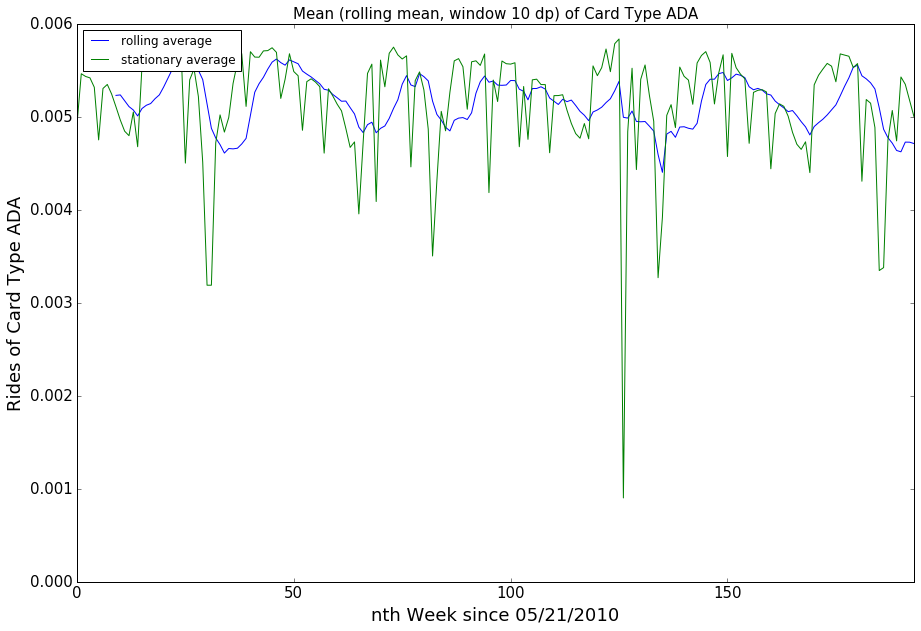

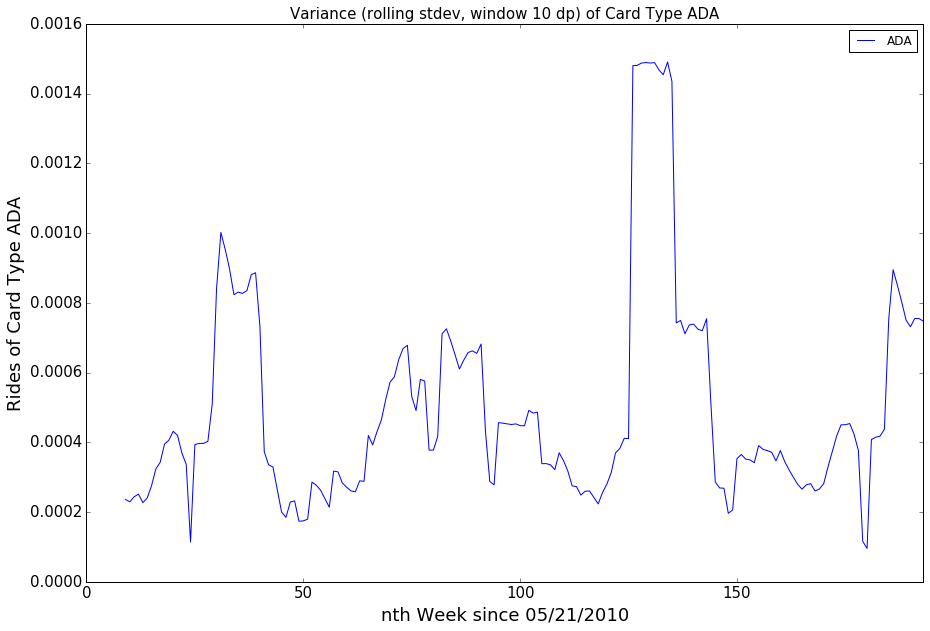

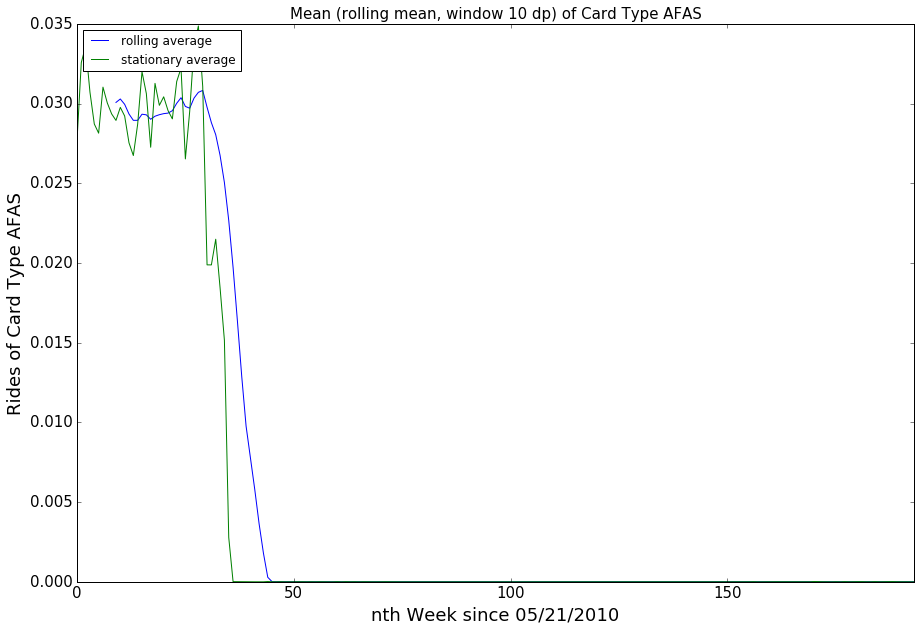

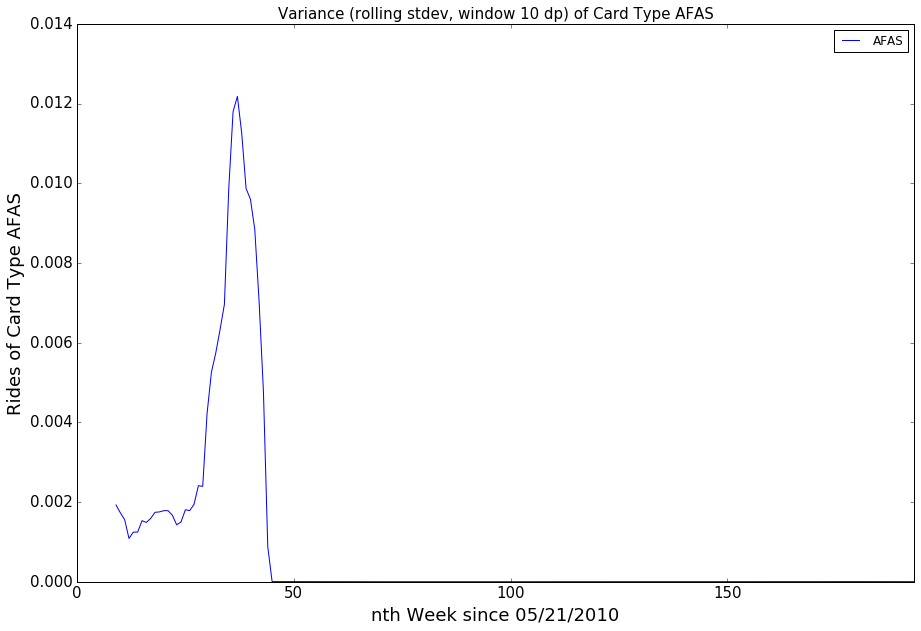

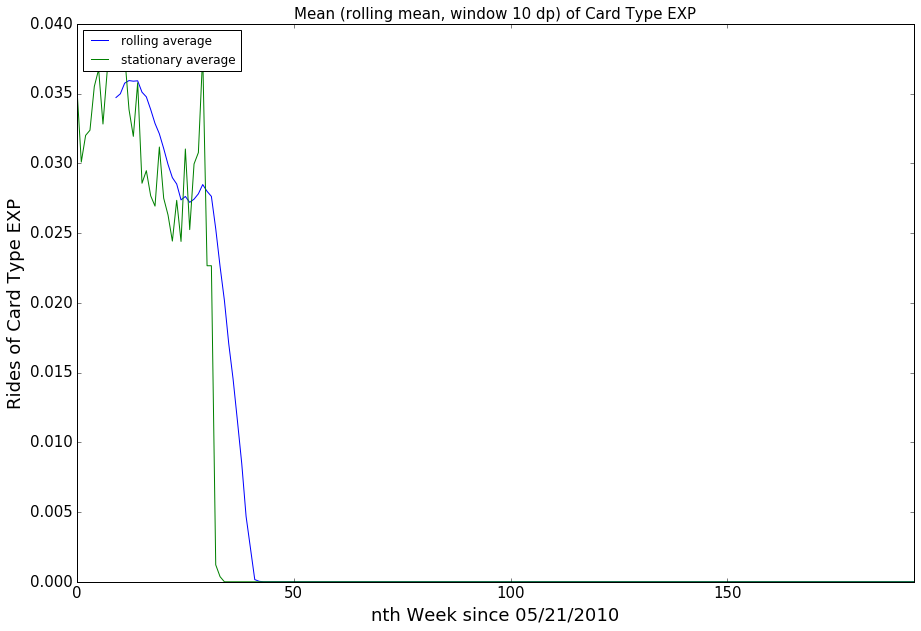

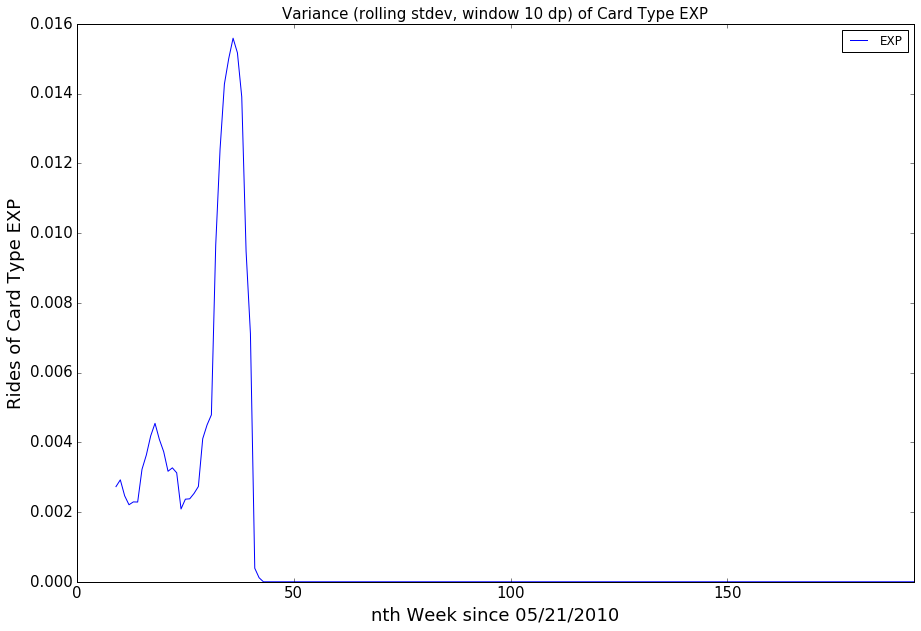

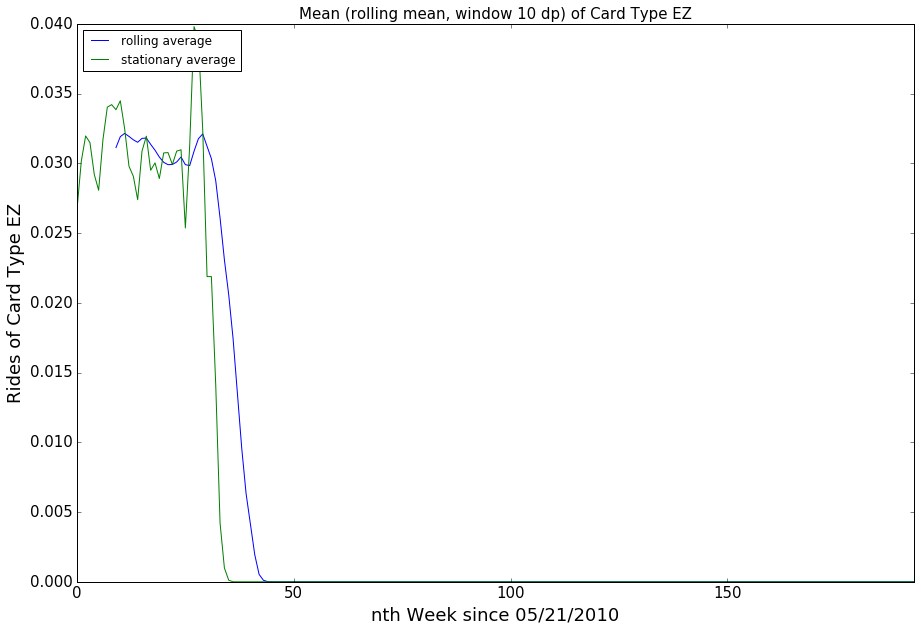

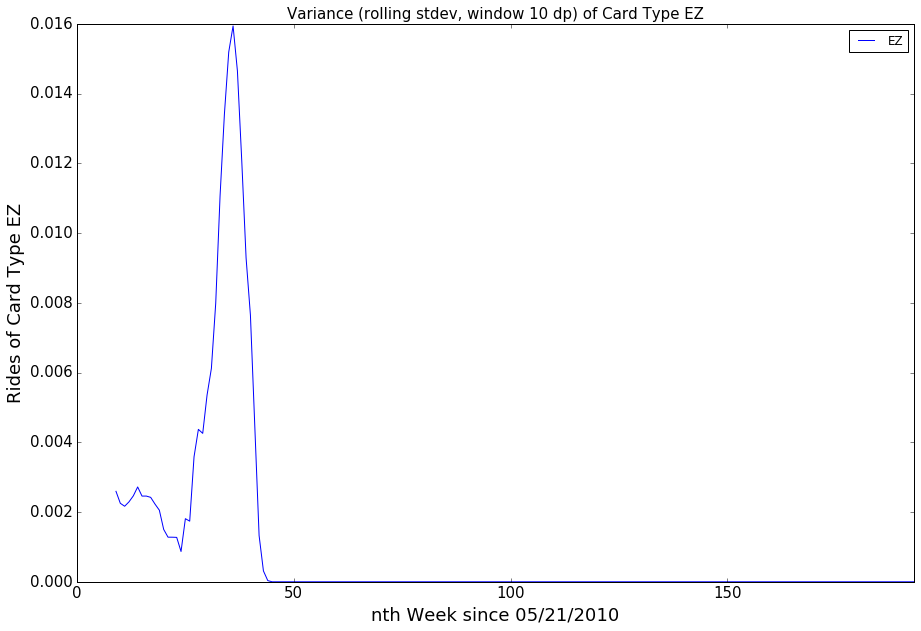

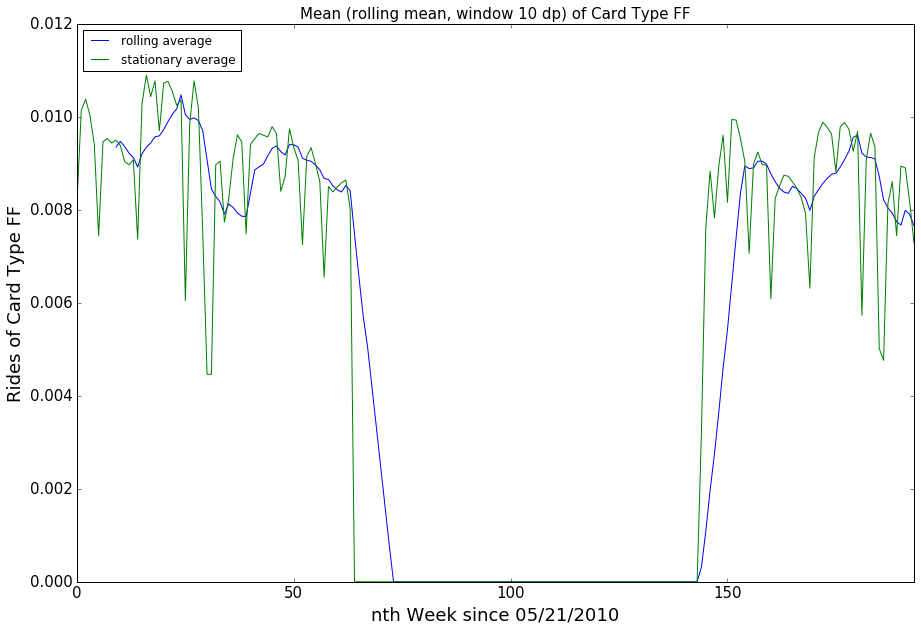

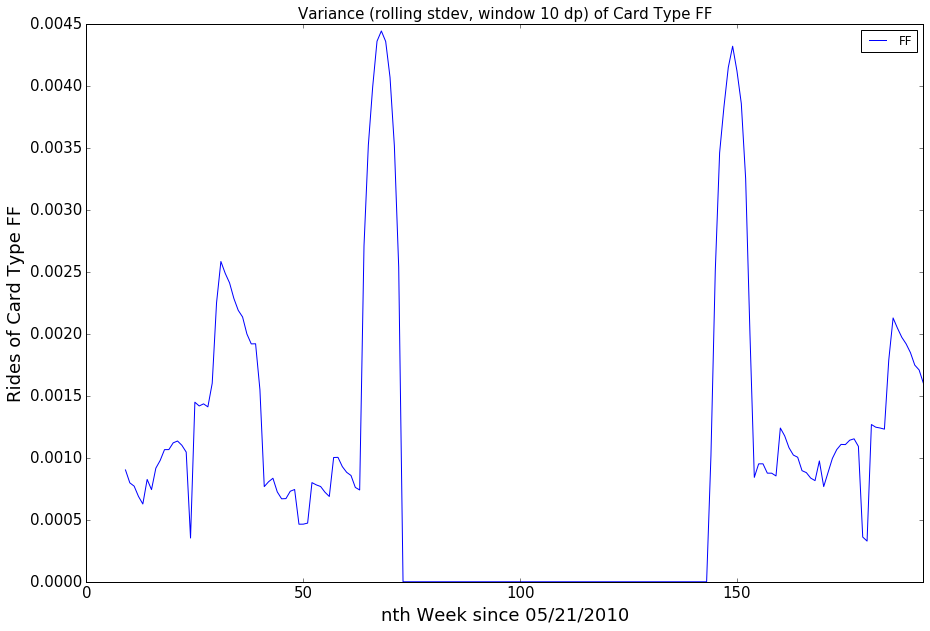

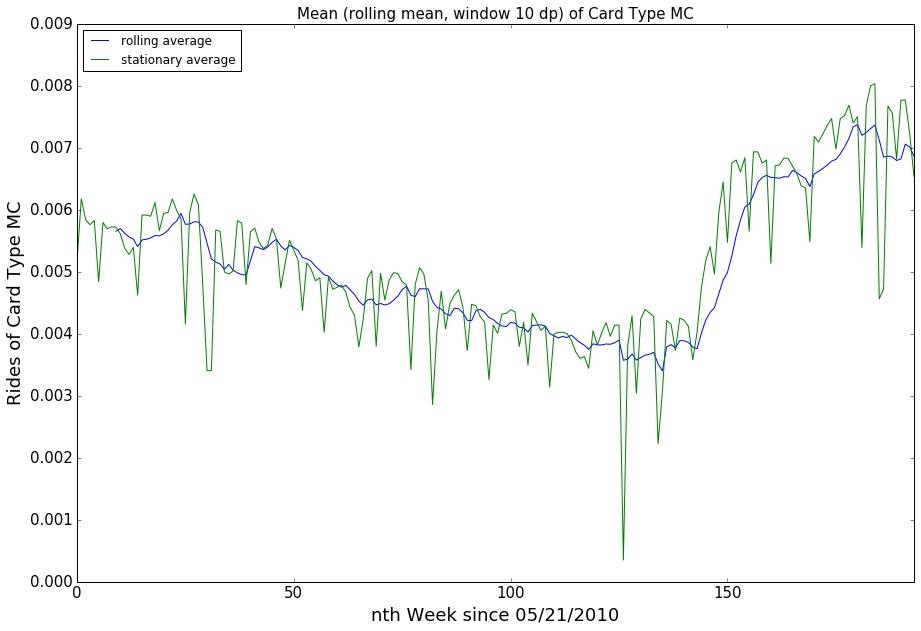

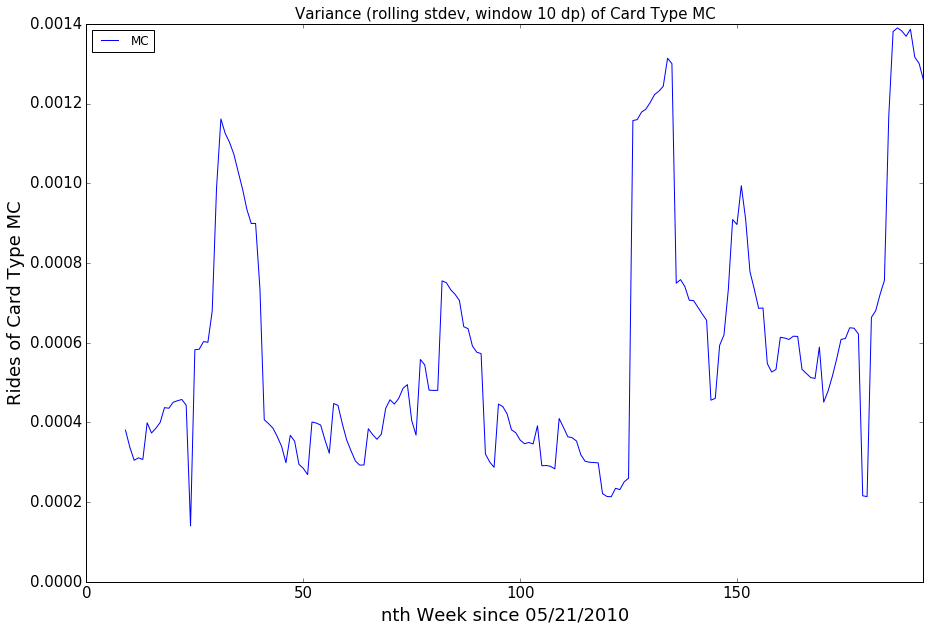

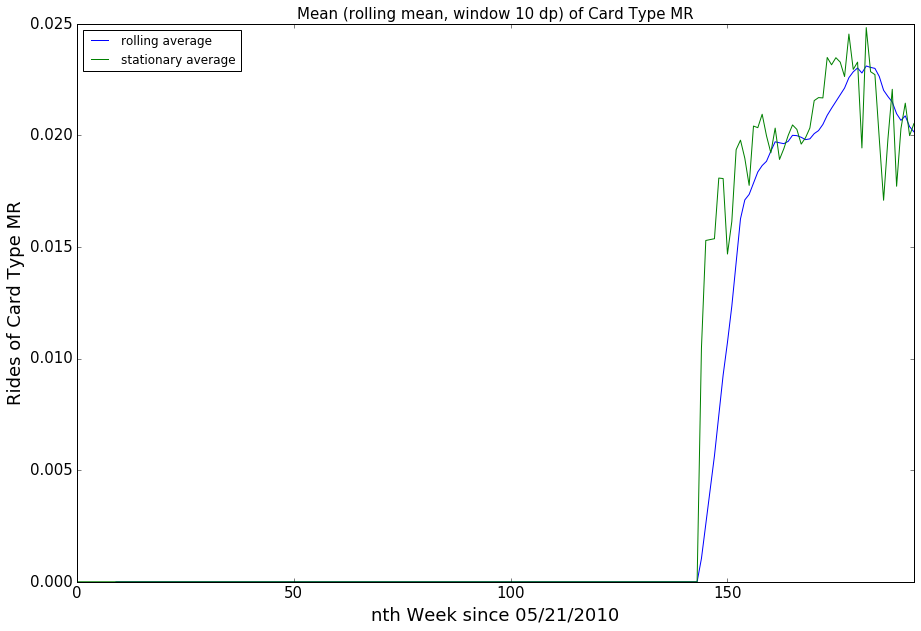

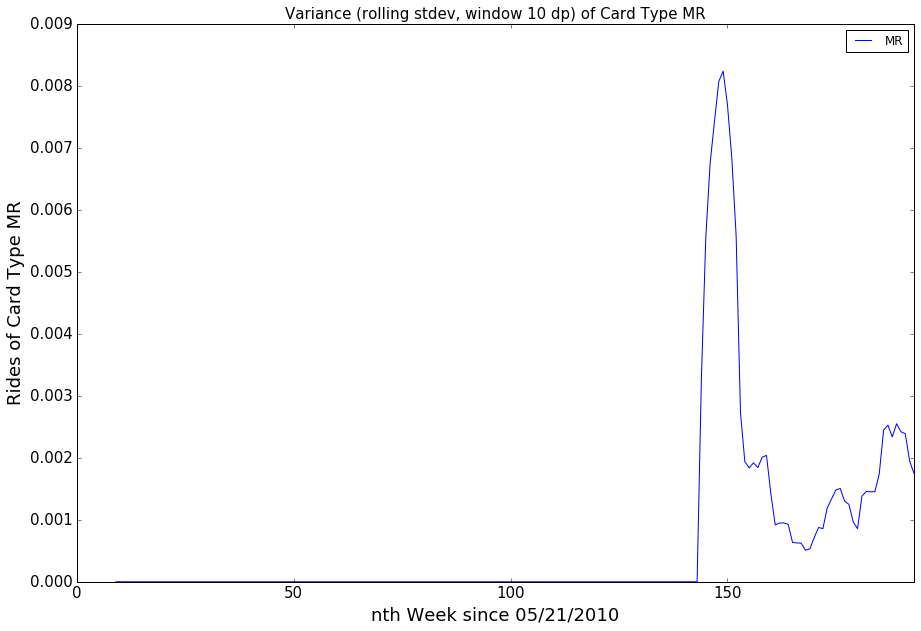

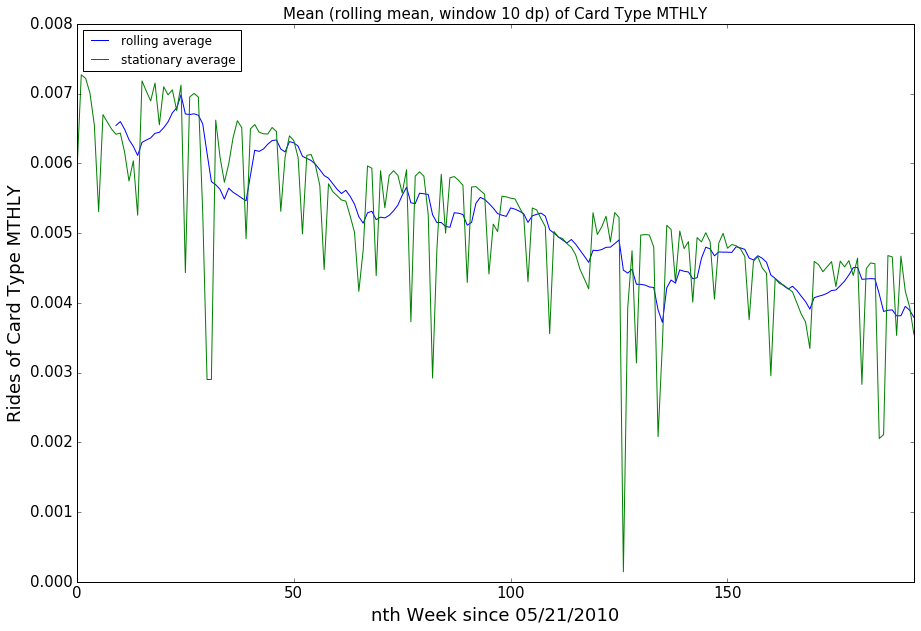

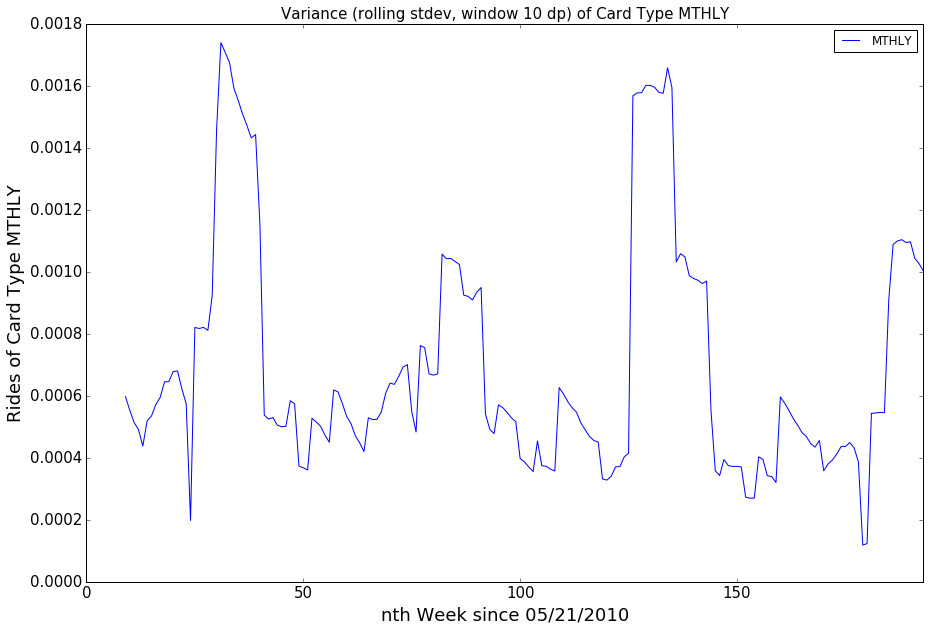

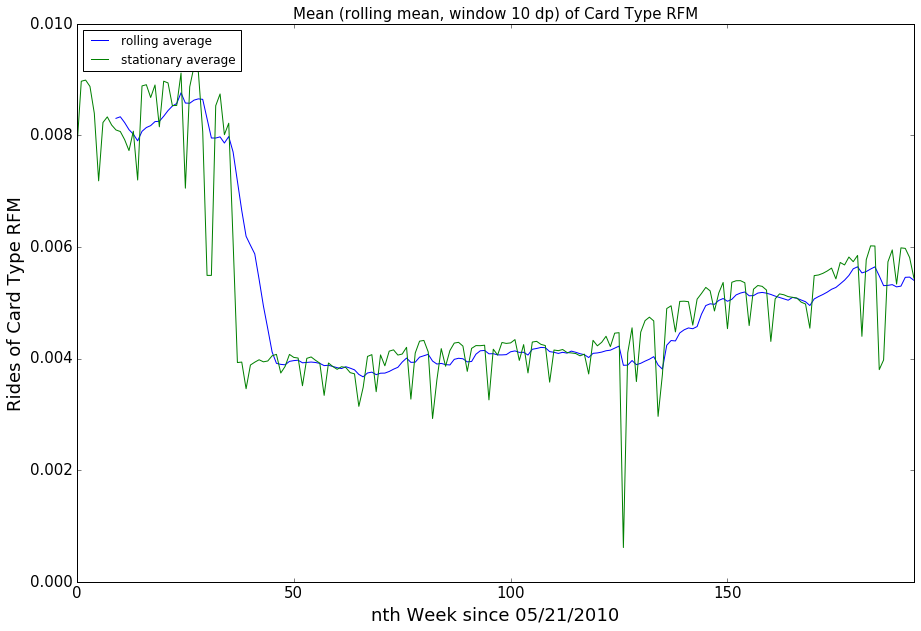

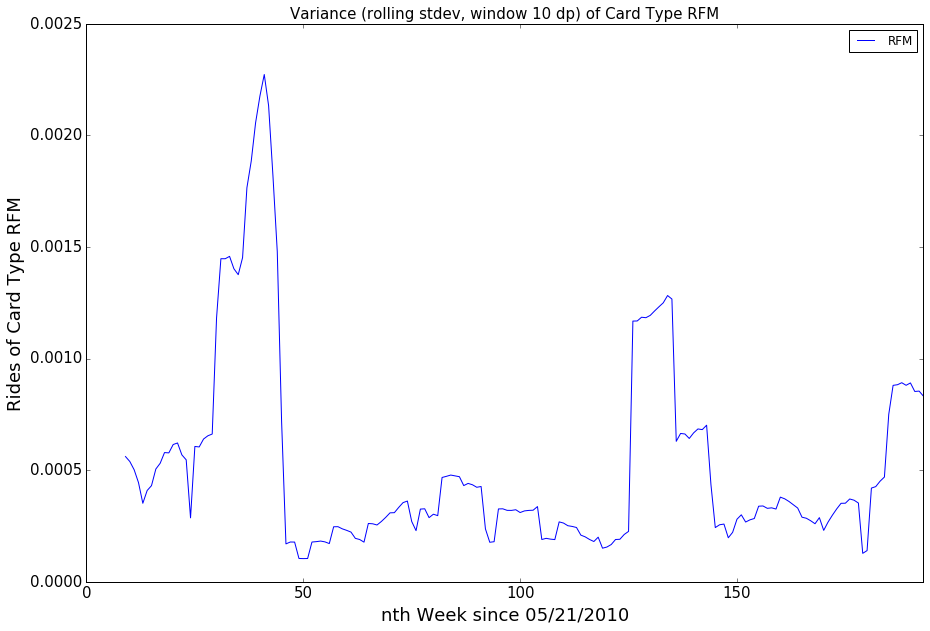

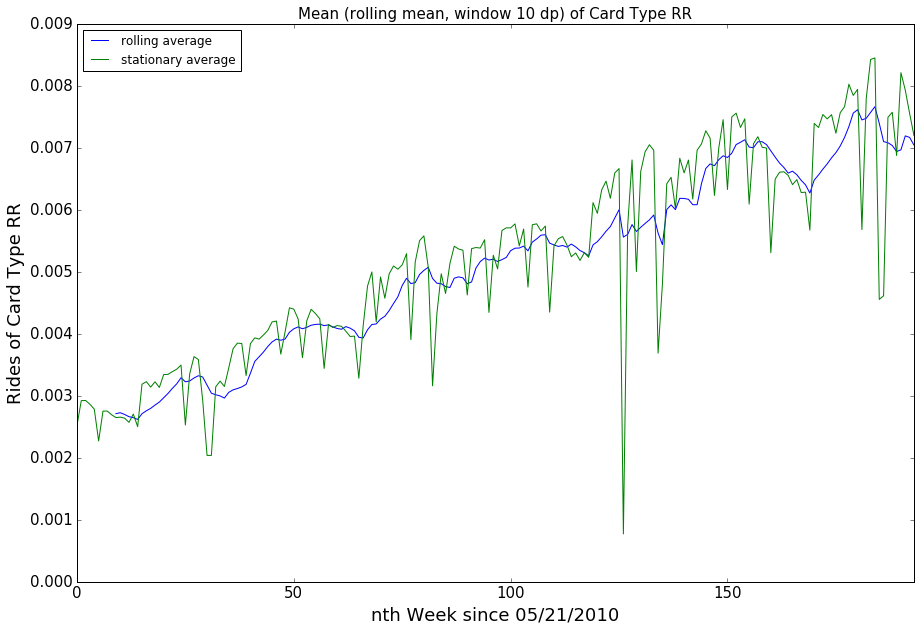

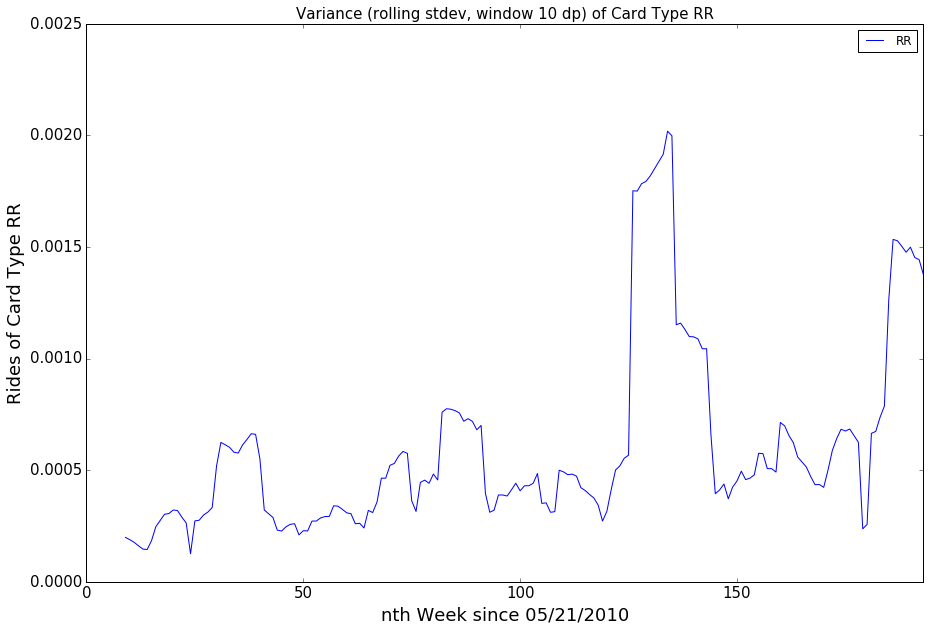

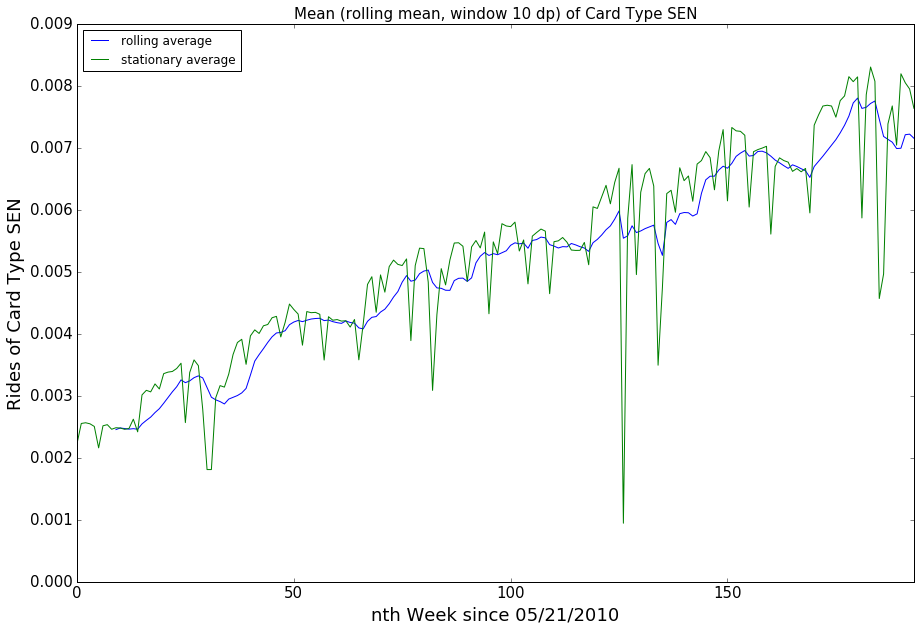

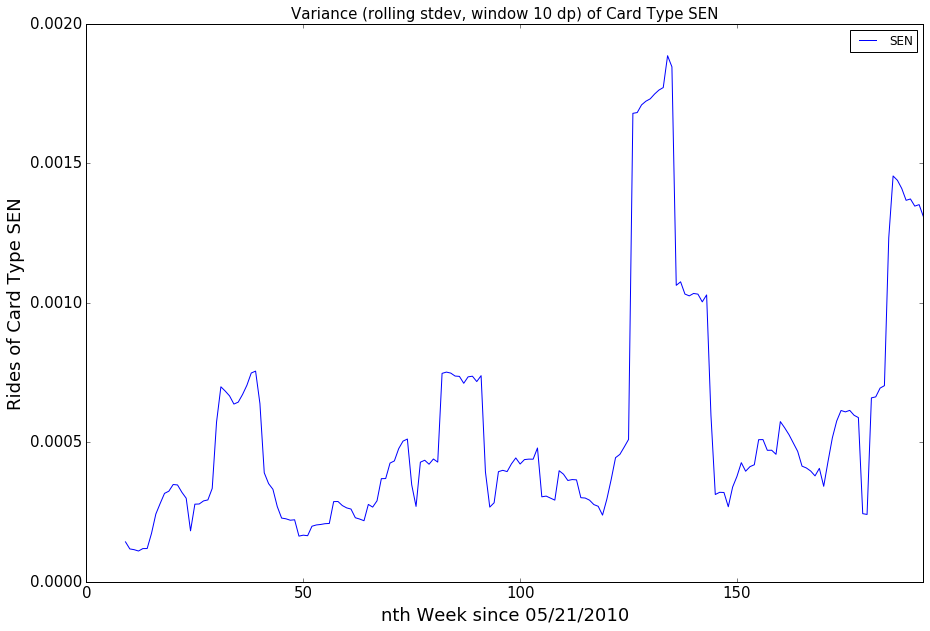

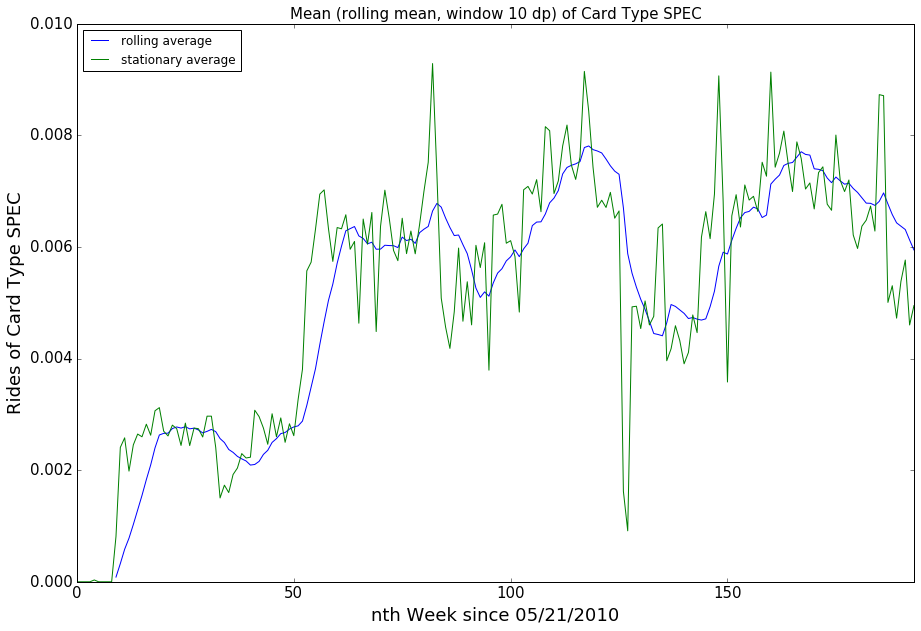

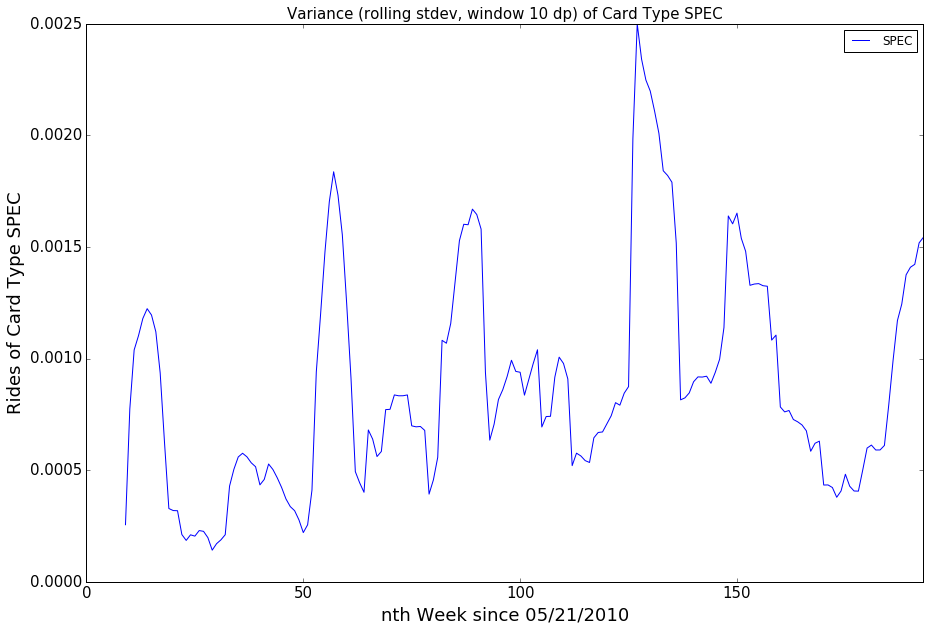

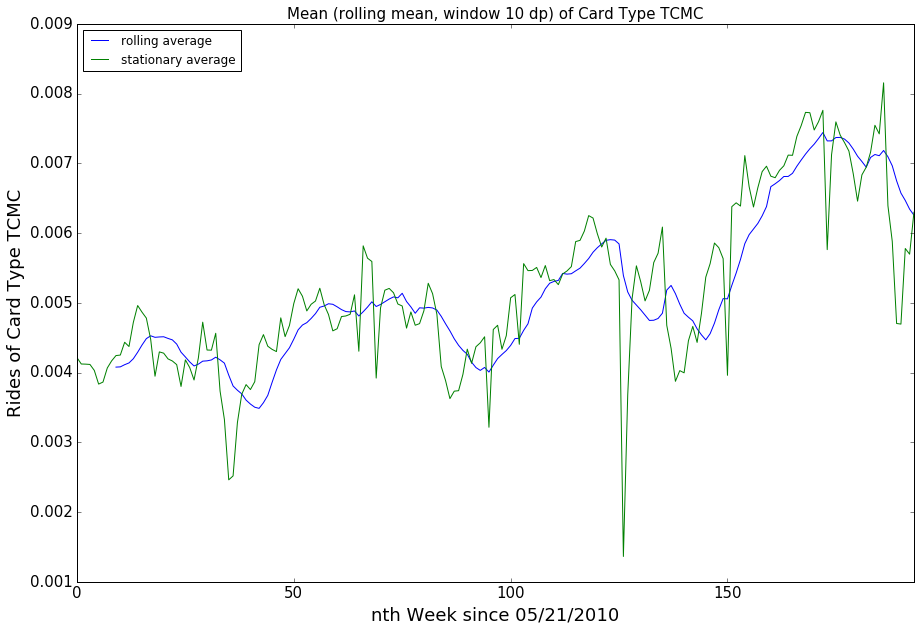

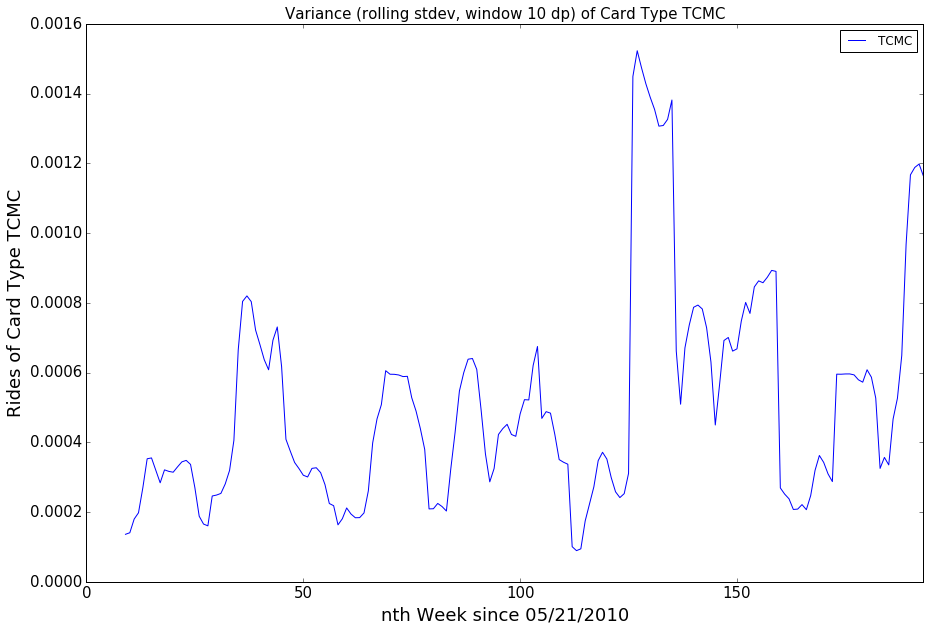

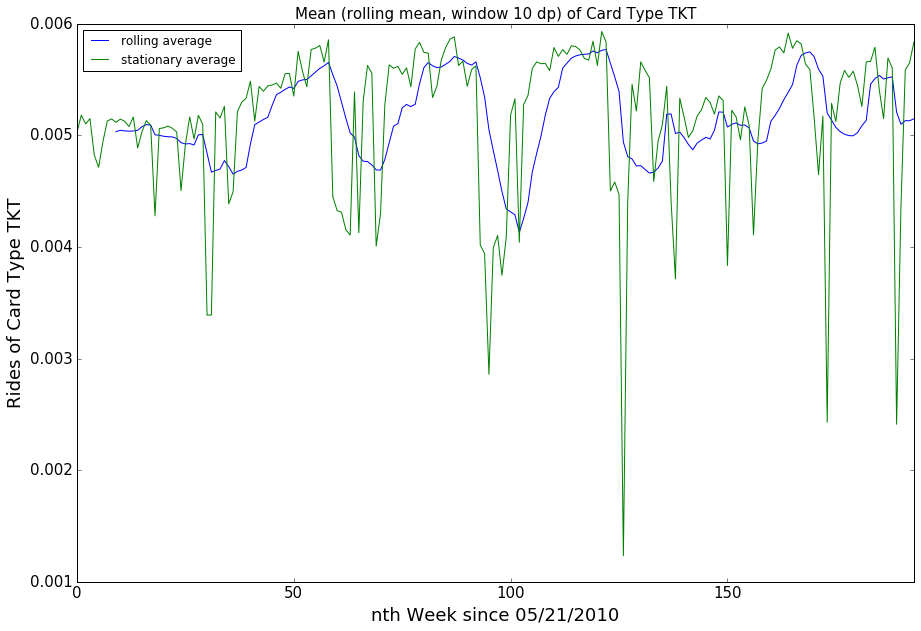

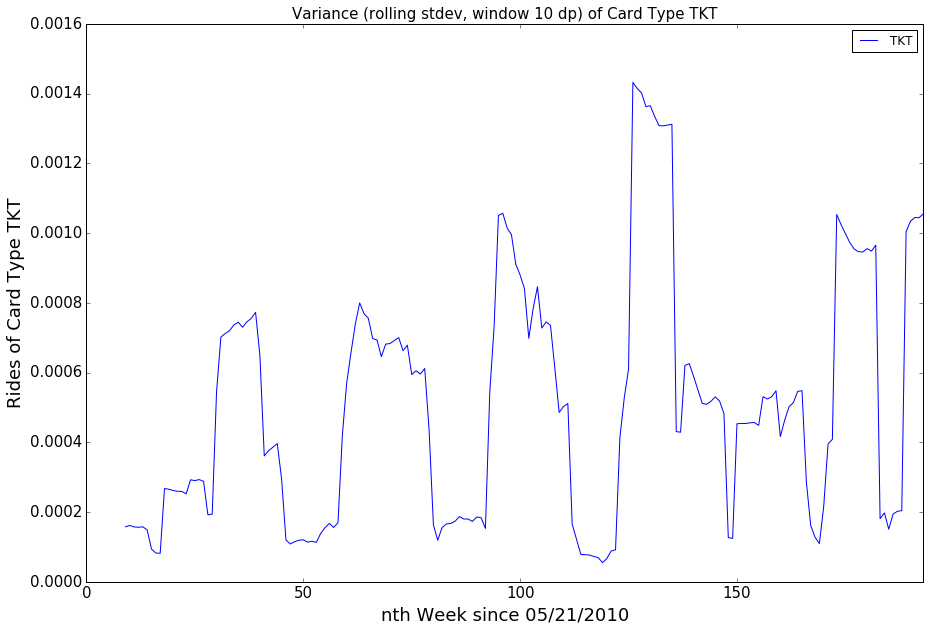

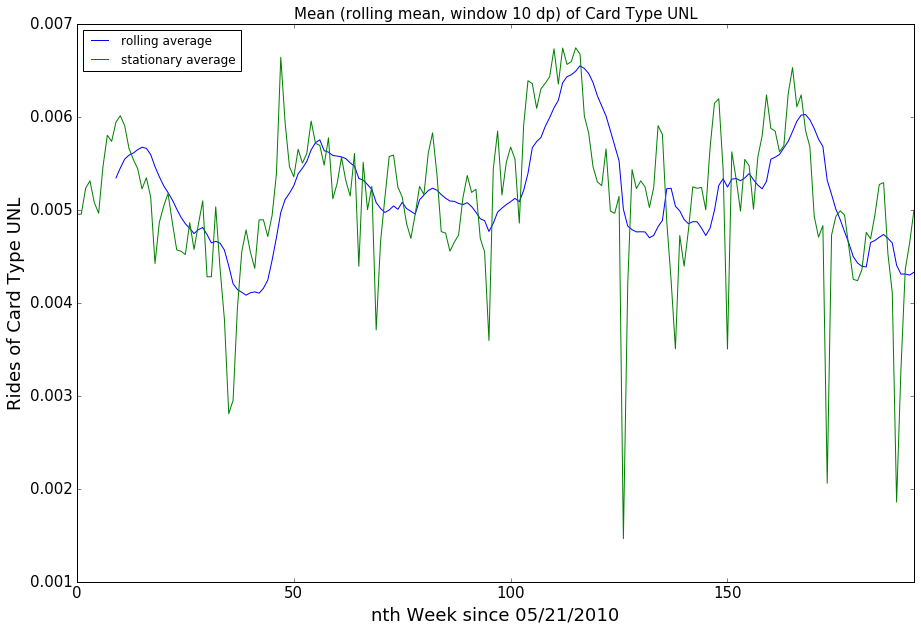

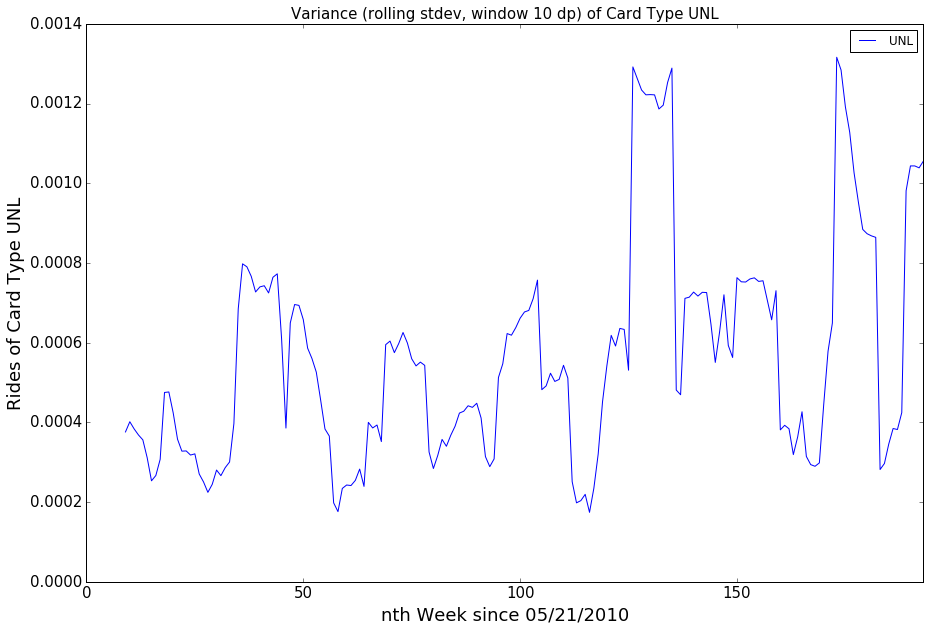

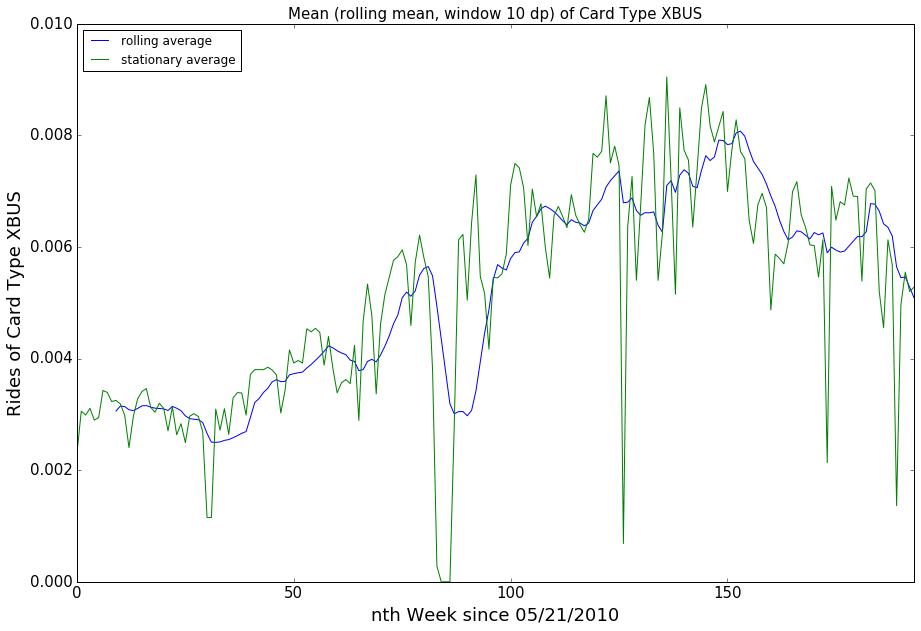

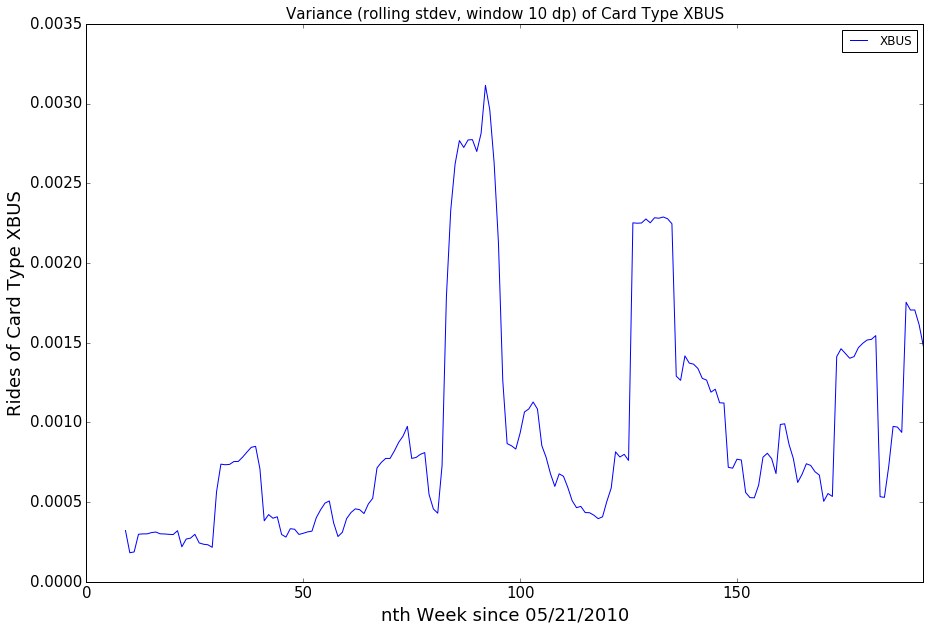

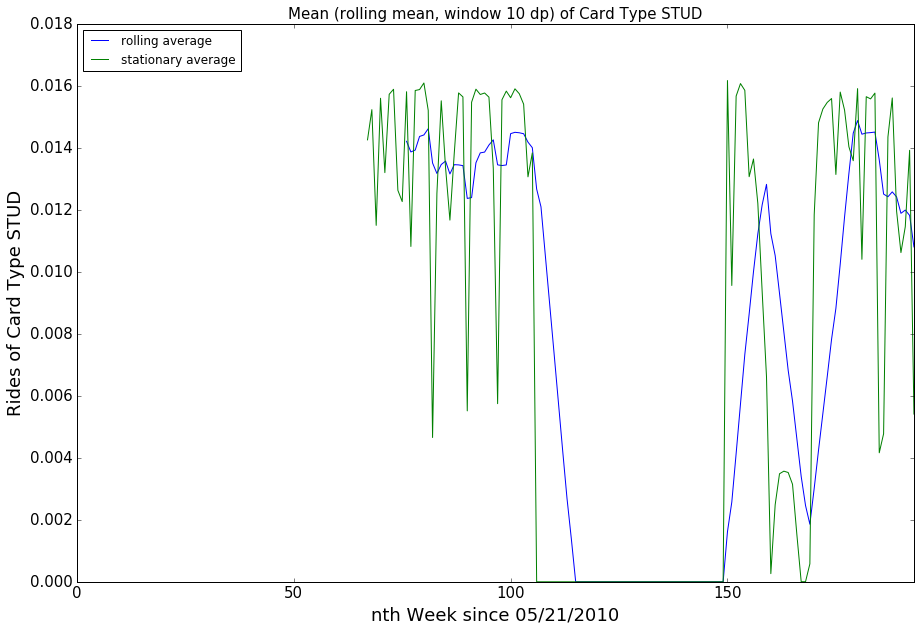

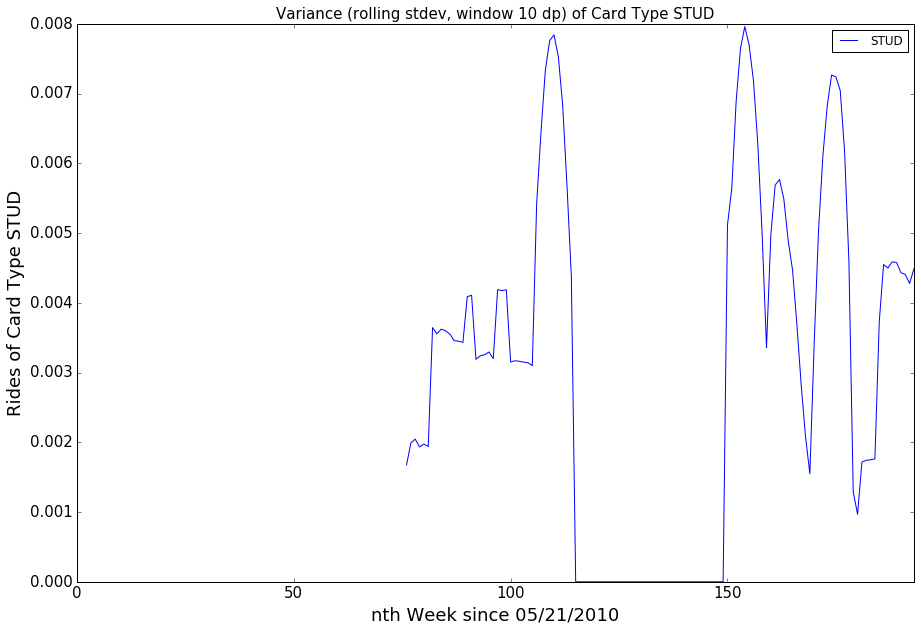

In [64]:
for i in ridetype:   
    fig = pl.figure(figsize=(15,10))
    ax = pd.rolling_mean(df1[i]/df1[i].sum(), 10).plot(figsize=(15,10), fontsize=20, label = "rolling average")
    ax.set_title("Mean (rolling mean, window 10 dp) of Card Type %s" % i, fontsize=15)
    pl.xlabel("nth Week since 05/21/2010", fontsize=18)
    pl.ylabel(("Rides of Card Type %s" % i), fontsize=18)
    pl.xticks(fontsize = 15)
    pl.yticks(fontsize = 15)
    ax.plot(df1[i]/df1[i].sum(), label="stationary average")
    pl.legend(loc = 2)
    
    fig = pl.figure(figsize=(15,10))
    ax = pd.rolling_std(df1[[i]]/df1[[i]].sum(), 10).plot(figsize=(15,10))
    ax.set_title("Variance (rolling stdev, window 10 dp) of Card Type %s" % i, fontsize=15)
    pl.xlabel("nth Week since 05/21/2010", fontsize=18)
    pl.ylabel(("Rides of Card Type %s" % i), fontsize=18)
    pl.xticks(fontsize = 15)
    pl.yticks(fontsize = 15)

## Pairs of plots above show the stationary vs rolling average of rides in a 10-day window, and the rolling variance, given each card type. 
Prominent steady downward trends are seen from card types in: AFAS, EXP, EZ, MTHLY and RFM. 
Prominent steady upward trends are seen from card types in: 14D, 7D, MR, RR, SEN, SPEC, TCMC, XBUS.

In [66]:
for i in ridetype:
    flux = (df1[i]/df1[i].sum()).rolling(window=10, center=False).mean()
    fluxRatio = flux[9] / flux[-1:]
    print ("the flux ratio beginning to end of {} is {:.2f}".format(i, float(fluxRatio.values)))

the flux ratio beginning to end of 10T is 0.98
the flux ratio beginning to end of 14D is 0.80
the flux ratio beginning to end of 1D is 0.90
the flux ratio beginning to end of 2T is 1.07
the flux ratio beginning to end of 30D is 0.97
the flux ratio beginning to end of 7D is 0.72
the flux ratio beginning to end of ADA is 1.11
the flux ratio beginning to end of AFAS is 4768.56
the flux ratio beginning to end of EXP is 93458.22
the flux ratio beginning to end of EZ is 665116.36
the flux ratio beginning to end of FF is 1.22
the flux ratio beginning to end of MC is 0.82
the flux ratio beginning to end of MR is 0.00
the flux ratio beginning to end of MTHLY is 1.73
the flux ratio beginning to end of RFM is 1.54
the flux ratio beginning to end of RR is 0.39
the flux ratio beginning to end of SEN is 0.34
the flux ratio beginning to end of SPEC is 0.01
the flux ratio beginning to end of TCMC is 0.65
the flux ratio beginning to end of TKT is 0.98
the flux ratio beginning to end of UNL is 1.23
the 

### From the values of flux ratios, card types such as EXP and EZ really stand out, but they hav very big numbers probabaly because the services are terminated or substituted by other card types. Similar situation applies for MR and SPEC, except started not existing. Excluding these card types, card types MTHLY saw the biggest increase and SEN the biggest decrease. 

# Task 3: Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks)

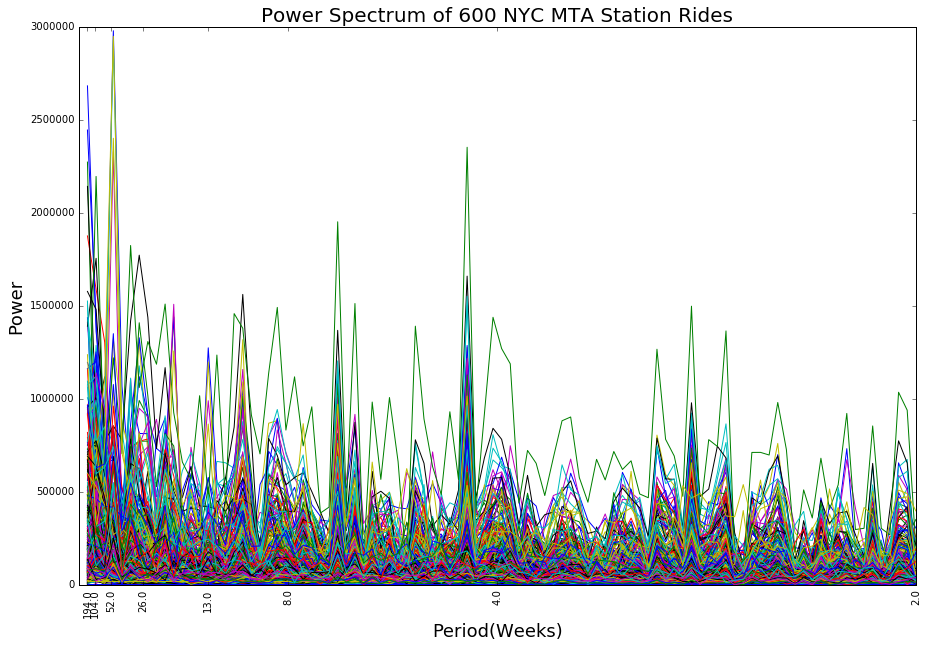

In [86]:
allperiods = [1./194, 1./104, 1./52, 1./26, 1./13, 1./8, 1./4, 1./2]

fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for i in range(len(sum_cardtypes)):
    f = np.abs(np.fft.rfft(sum_cardtypes[i]))
    ax.plot(np.fft.rfftfreq(len(ridesDate), 1.0)[1:], (f[1:]))
ax.set_xticks(allperiods)
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)
ax.set_xlabel('Period(Weeks)', fontsize=18)
ax.set_ylabel('Power', fontsize=18)
ax.set_title('Power Spectrum of 600 NYC MTA Station Rides', fontsize=20)

### Fourier Transformation of Rides over 600 NYC MTA Stations. At the 52 weeks Period, there are four different colors of peak of wave.

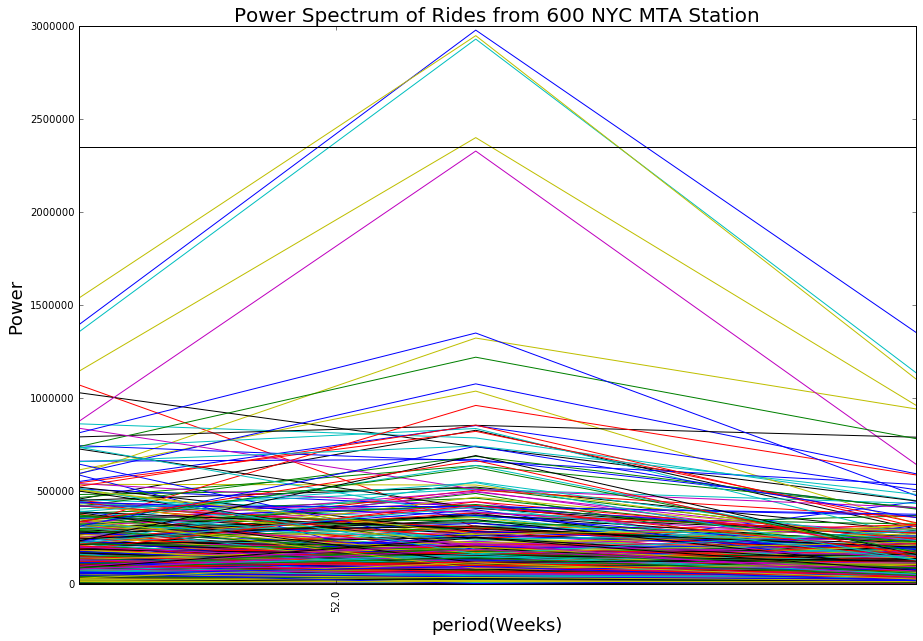

In [87]:
index = []
fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for i in range(len(sum_cardtypes)):
    f = np.abs(np.fft.rfft(sum_cardtypes[i]))
    ax.plot(np.fft.rfftfreq(len(ridesDate), 1.0)[1:], (f[1:]))
    if f[4] > 2.35e6:
        index.append(i)
ax.plot((1./60, 1./40), (2.35e6, 2.35e6), 'k-')
ax.set_xticks(allperiods)
ax.set_xticklabels([ "%s"%(1/x) for x in allperiods], rotation=90)
ax.set_xlim(1./60, 1./40)
ax.set_xlabel('Period(Weeks)', fontsize = 18)
ax.set_ylabel('Power', fontsize = 18)
ax.set_title('Power Spectrum of Rides from 600 NYC MTA Station', fontsize = 20)

### Four peaks above the horizonal line. 

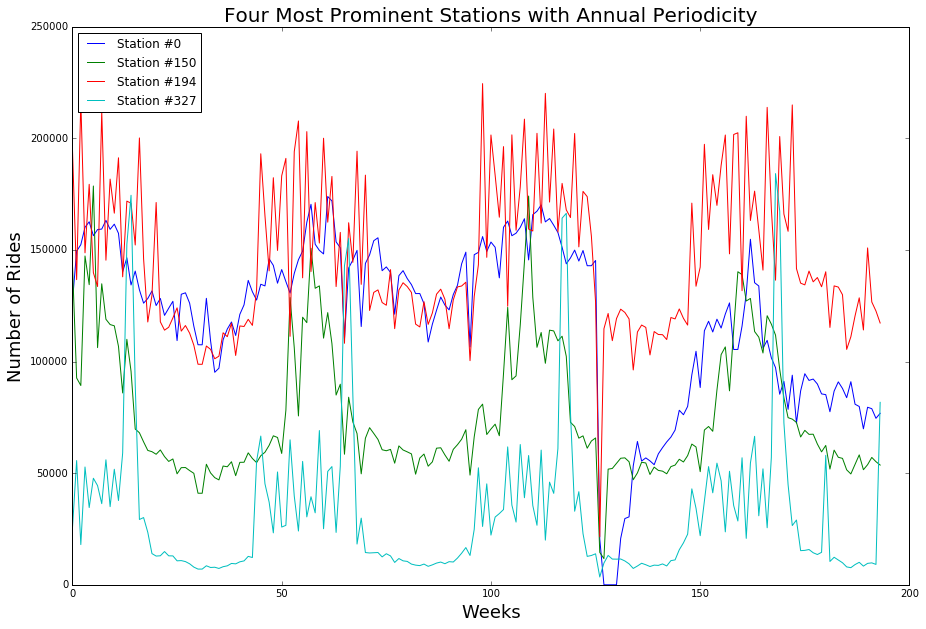

In [80]:
pl.figure(figsize=(15,10))
for i in index:
    pl.plot(sum_cardtypes[i], label='Station #%s'%i)
pl.xlabel('Weeks', fontsize=18)
pl.ylabel('Number of Rides', fontsize=18)
pl.title('Four Most Prominent Stations with Annual Periodicity', fontsize=20)
pl.legend(loc = 2)